In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

x_train_shape: (60000, 28, 28, 1)
no of images in x train 60000
no of images in x test 10000
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7653 - loss: 0.7772 - val_accuracy: 0.9747 - val_loss: 0.0880
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9638 - loss: 0.1183
Test accuracy: 0.9704999923706055
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


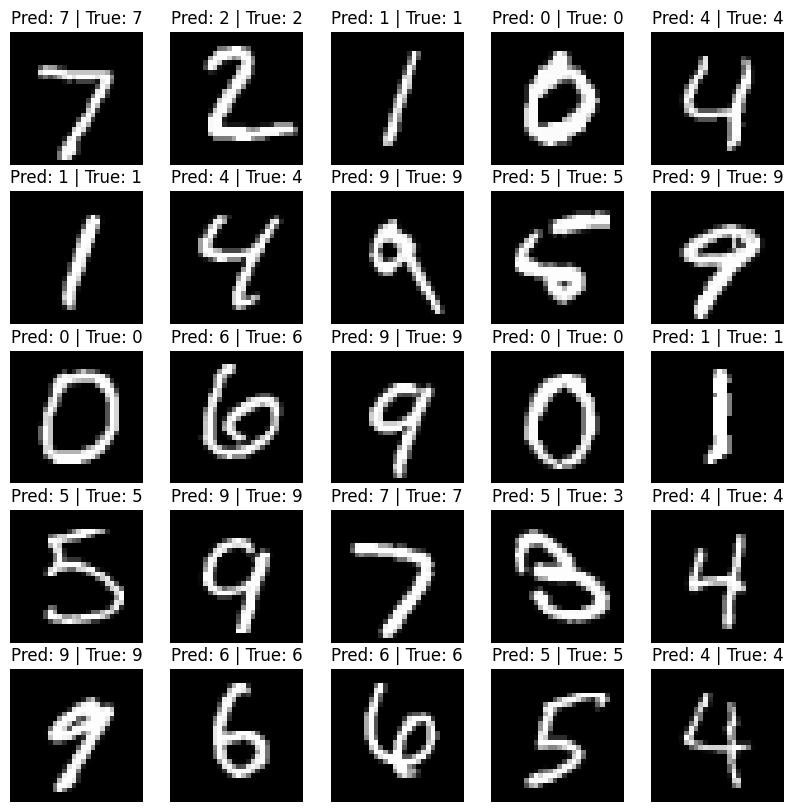

FileNotFoundError: [Errno 2] No such file or directory: 'test_image.png'

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)



print('x_train_shape:',x_train.shape)
print('no of images in x train',x_train.shape[0])
print('no of images in x test',x_test.shape[0])





model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=1, validation_split=0.1)


test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i, :, :, 0], cmap="gray")
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title("Pred: {} | True: {}".format(predicted_label, true_label))
    plt.axis("off")
plt.show()


image_path = "test_image.png"
image = Image.open(image_path).convert("L").resize((28, 28))
image_arr = np.array(image).astype("float32") / 255.0
image_arr = np.expand_dims(image_arr, 0)
image_arr = np.expand_dims(image_arr, -1)

prediction = model.predict(image_arr)
predicted_label = np.argmax(prediction)
model.evaluate(x_test,y_test)
print("Predicted label:", predicted_label)